In [4]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from os import listdir
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras import Sequential

In [36]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)

# Creating training set
training_set = train_datagen.flow_from_directory('kagglecatsanddogs_5340/PetImages',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
# Creating the Test set
test_set = test_datagen.flow_from_directory('kagglecatsanddogs_5340/PetImages',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 24995 images belonging to 2 classes.
Found 24995 images belonging to 2 classes.


In [37]:
training_set.class_indices

{'Cat': 0, 'Dog': 1}

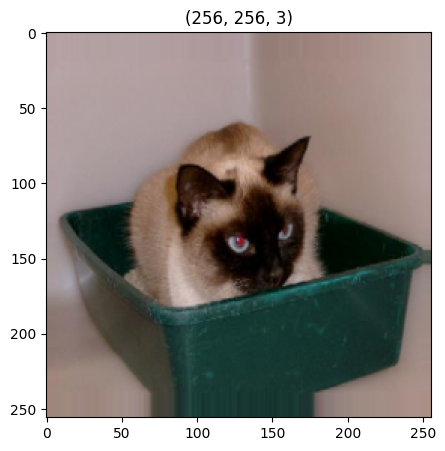

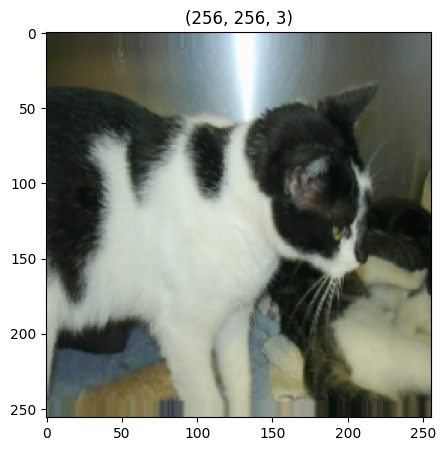

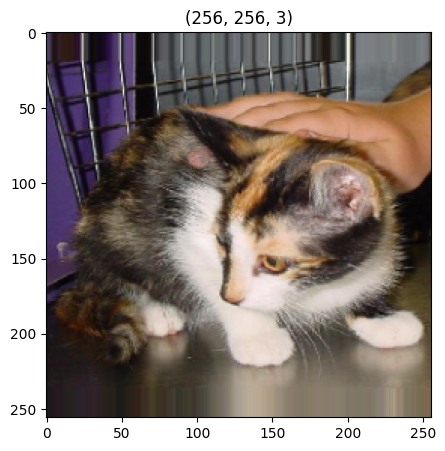

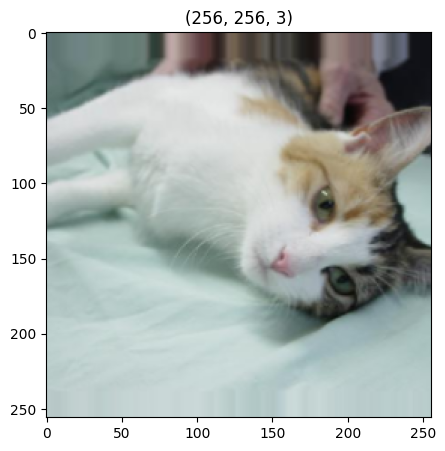

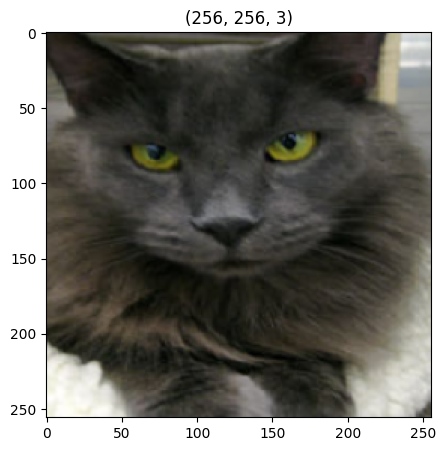

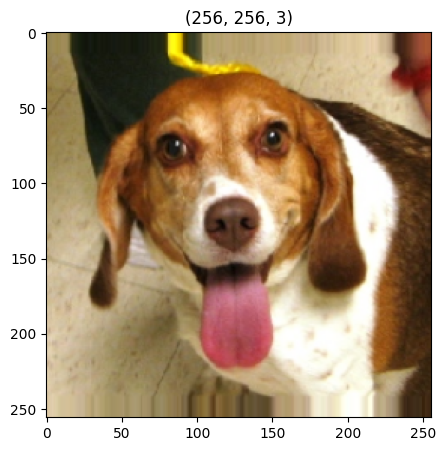

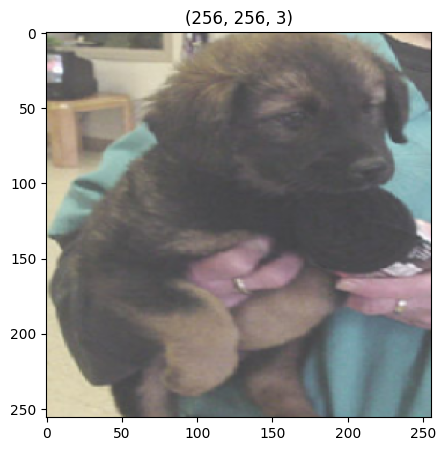

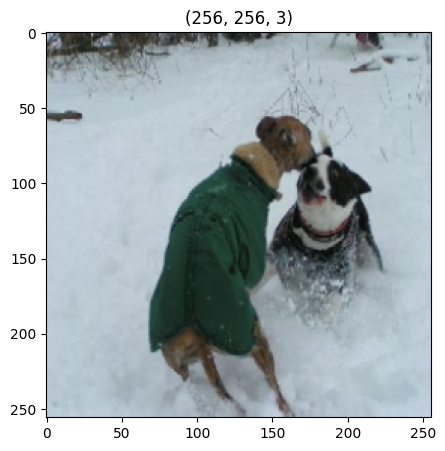

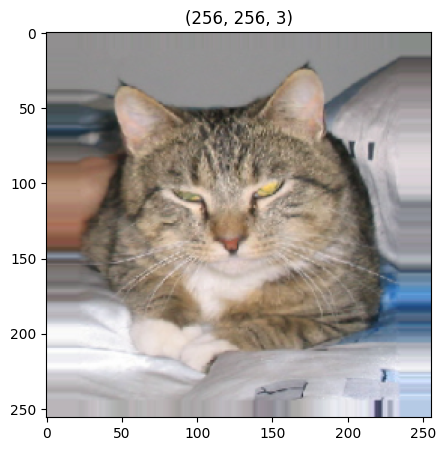

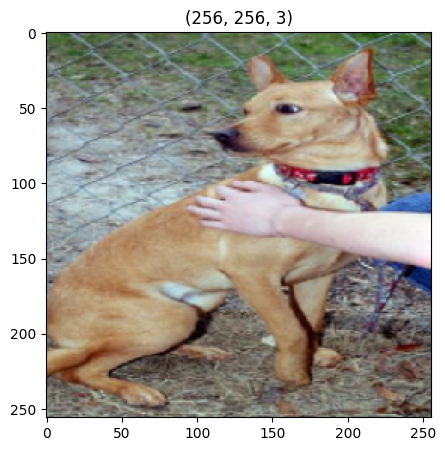

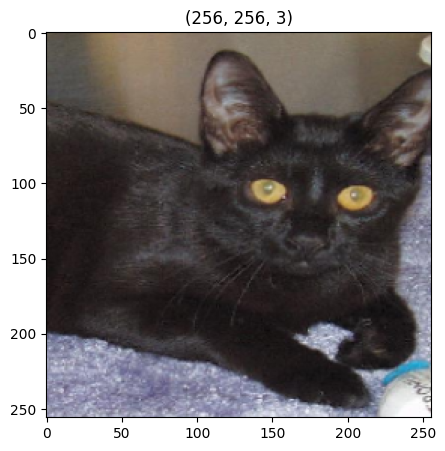

In [38]:
def plotImages(img_arr, label):
    for idx, img in enumerate(img_arr):
        if idx <= 10:
            plt.figure(figsize=(5,5))
            plt.imshow(img)
            plt.title(img.shape)
            plt.axis = False
            plt.show()

t_img, label = training_set.next()
plotImages(t_img, label)

In [62]:
# Define Sequential model with 3 layers
model = Sequential([
        Conv2D(32, 3, activation="relu", input_shape=(256, 256, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid'),
    ])

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 flatten_17 (Flatten)        (None, 516128)            0         
                                                                 
 dense_34 (Dense)            (None, 128)               66064512  
                                                                 
 dense_35 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66065537 (252.02 MB)
Trainable params: 66065537 (252.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________

In [63]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
history = model.fit(
    training_set,
    steps_per_epoch=500,
    epochs=15,
    validation_data=test_set,
    validation_steps=200
)

Epoch 1/15
500/500 [==============================] - 208s 414ms/step - loss: 1.1913 - accuracy: 0.6295 - val_loss: 0.5823 - val_accuracy: 0.6933
Epoch 2/15
500/500 [==============================] - 158s 315ms/step - loss: 0.5954 - accuracy: 0.6812 - val_loss: 0.5853 - val_accuracy: 0.7063
Epoch 3/15
500/500 [==============================] - 153s 305ms/step - loss: 0.5747 - accuracy: 0.7022 - val_loss: 0.5547 - val_accuracy: 0.7261
Epoch 4/15
500/500 [==============================] - 152s 303ms/step - loss: 0.5531 - accuracy: 0.7171 - val_loss: 0.5186 - val_accuracy: 0.7442
Epoch 5/15
500/500 [==============================] - 152s 303ms/step - loss: 0.5450 - accuracy: 0.7258 - val_loss: 0.5195 - val_accuracy: 0.7370
Epoch 6/15
500/500 [==============================] - 154s 308ms/step - loss: 0.5297 - accuracy: 0.7346 - val_loss: 0.5220 - val_accuracy: 0.7480
Epoch 7/15
500/500 [==============================] - 149s 297ms/step - loss: 0.5094 - accuracy: 0.7491 - val_loss: 0.4858 -

In [3]:
import os
import io
from PIL import Image

base_path = 'kagglecatsanddogs_5340/PetImages/Cat'

for file in os.listdir(base_path):
    try:
        # This portion is part of my test code
        byteImgIO = io.BytesIO()
        byteImg = Image.open(os.path.join(base_path, file))
        byteImg.save(byteImgIO, "PNG")
        byteImgIO.seek(0)
        byteImg = byteImgIO.read()
        
        
        # Non test code
        dataBytesIO = io.BytesIO(byteImg)
        Image.open(dataBytesIO)
    except:
        print(file)

.DS_Store
666.jpg


In [56]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

# Load and preprocess the image
def preprocess_image(image_path, target_size=(256, 256)):
    # Load the image
    img = load_img(image_path, target_size=target_size)
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    # Scale the image (if your training data was scaled to 0-1)
    img_array /= 255.0
    # Expand dimensions to match the model's input format (batch_size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


In [68]:
# Example usage
image_path = 'kagglecatsanddogs_5340/PetImages/Dog/1.jpg'  # Replace with the path to your image
preprocessed_image = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(preprocessed_image)

# For binary classification, the output is a probability
# You might convert it to a binary outcome based on a threshold (e.g., 0.5)
if prediction[0][0] > 0.5:
    print("The model predicts 'dog' with probability:", prediction[0][0])
else:
    print("The model predicts 'cat' with probability:", 1 - prediction[0][0])

1/1 [==============================] - 0s 76ms/step
The model predicts 'dog' with probability: 0.9338633
